In [6]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 12.1: Inferring the probability of a coin toss from data

This is our first Bayesian inference example!

Let's say that we run a coin toss experiment $N$ times and we wish to figure out the probability of heads.
We will bring into the picture all the mathematical machinery we have introduced so far.
Let's say that the data we have observe are $x_1,\dots,x_N$.
For notational convenience we will be writing:
$$
x_{1:N} := (x_1,\dots,x_N).
$$

First, let's start with the probability of success of the coin toss.
Let's call it $\theta$.
How can we describe our uncertainty about it?
We have to assign a *prior* probability distribution on it.
Let's say that we don't know anything about it except that it must be between 0 and 1.
What distribution should we assign?
Of course, a uniform distribution:
$$
\theta \sim U([0,1]).
$$
Second, each coin toss experiment corresponds to an independent Bernoulli variable with the same probability of success $\theta$.
We write:
$$
X_n | \theta \sim \operatorname{Bernoulli}(\theta),
$$
for $n=1,\dots,N$.
Note that these random variables depend on $\theta$.
That's why we are conditioning like this.

Before proceeding with the mathematics, let's draw the graph.

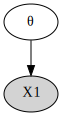

In [1]:
# First for one coin toss
from graphviz import Digraph
gc = Digraph('coin_toss_bayes_1')
gc.node('theta', label='<&theta;>')
gc.node('X1', label='<X<sub>1</sub>>', style='filled')
gc.edge('theta', 'X1')
gc.render('coin_toss_bayes_1', format='png')
gc

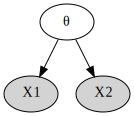

In [2]:
# Now for two coin tosses
gc2 = Digraph('coin_toss_bayes_2')
gc2.node('theta', label='<&theta;>')
gc2.node('X1', label='<X<sub>1</sub>>', style='filled')
gc2.node('X2', label='<X<sub>2</sub>>', style='filled')
gc2.edge('theta', 'X1')
gc2.edge('theta', 'X2')
gc2.render('coin_toss_bayes_2', format='png')
gc2

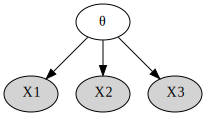

In [5]:
# Now for three coin tosses
gc3 = Digraph('coin_toss_bayes_3')
gc3.node('theta', label='<&theta;>')
gc3.node('X1', label='<X<sub>1</sub>>', style='filled')
gc3.node('X2', label='<X<sub>2</sub>>', style='filled')
gc3.node('X3', label='<X<sub>3</sub>>', style='filled')
gc3.edge('theta', 'X1')
gc3.edge('theta', 'X2')
gc3.edge('theta', 'X3')
gc3.render('coin_toss_bayes_3', format='png')
gc3

Because this notation gets a little bit too involved, we introduce the so called [plate notation](https://en.wikipedia.org/wiki/Plate_notation).
Whategver is inside the subgrpah indicated by the box is supposed to be repeated as many times as indicated:

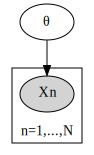

In [4]:
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('Xn', label='<X<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'Xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

To carry out Bayesian inference, we need the joint probability density of all variables.
It is:
$$
p(x_1,\dots,x_N, \theta) = p(x_{1:N}|\theta) p(\theta) = \left(\prod_{n=1}p(x_n|\theta)\right)p(\theta),
$$
where we first used Bayes' rule and then the fact that the coin tosses are independent.
We must find the mathematical form of all these expressions.
For $\theta$, we simply have:
$$
p(\theta) = 1_{[0,1]}(\theta),
$$
where $1_A(x)$ is the indicator function of $A$, i.e., $1_A(x) = 1$ if $x$ is in $A$ and zero otherwise.
For the Bernoulli pmf's we have:
$$
p(X_n = 1|\theta) = \theta,
$$
and
$$
p(X_n = 0|\theta) = 1- \theta.
$$
So, in a unified way, we can write:
$$
p(x_n | \theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$
Now, let's re-write the joint pmf:
$$
p(x_1,\dots,x_N, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta),
$$
which has a nice interpretation as it depends only on the total number of heads $\sum_{n=1}^Nx_n$.

Now, we are in a position to apply Bayes rule to condition on the data.
We have:
$$
p(\theta|x_{1:N}) = \frac{p(x_{1:N},\theta)}{p(x_{1:N})} \propto p(x_{1:N}, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta).
$$
It may be the first time you encounter this, but we have actually discovered a new distribution called the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).
This is what the posterior turns out to be.
This is one of the few instances where the posterior is analytically available.

Now, that we know about the Beta distribution, we can write for the posterior of $\theta$:
$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$
where with $\operatorname{Beta}(\theta|\alpha,\beta)$ we mean the PDF of the $\operatorname{Beta}(\alpha,\beta)$ evaluated at $\theta$ (this is a very useful notation).
So, we see that the $\alpha$ parameter is just one plus the number of heads and the $\beta$ parameter is one plus the number of tails.

Let's try this out with some fake data.

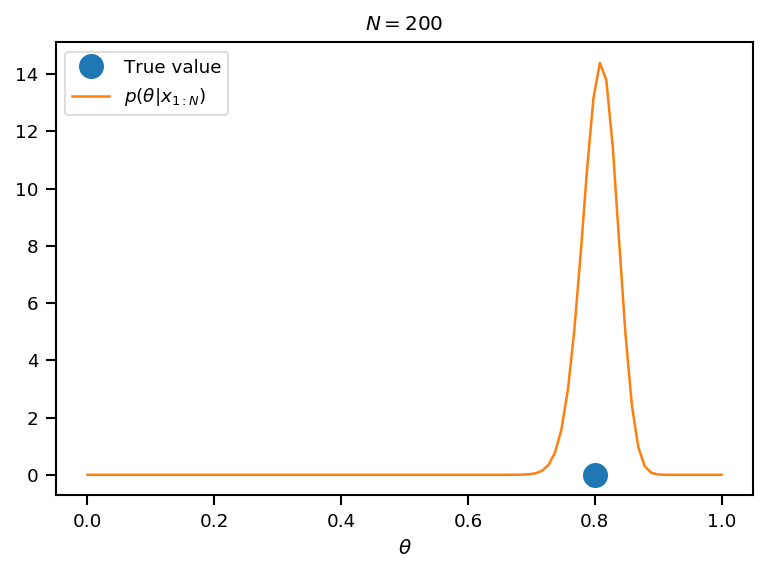

In [9]:
import scipy.stats as st
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)
# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 200
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots(dpi=150)
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best');

### Questions

+ Experiment with different values of $\theta_{\text{true}}$ and different values of $N$.
+ Is the true value always covered by the posterior PDF?